
=== Missing Values ===
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

=== Cleaned Data (Preview) ===


C:\Users\Pranika Kumar\AppData\Local\Temp\ipykernel_25500\2966012385.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())


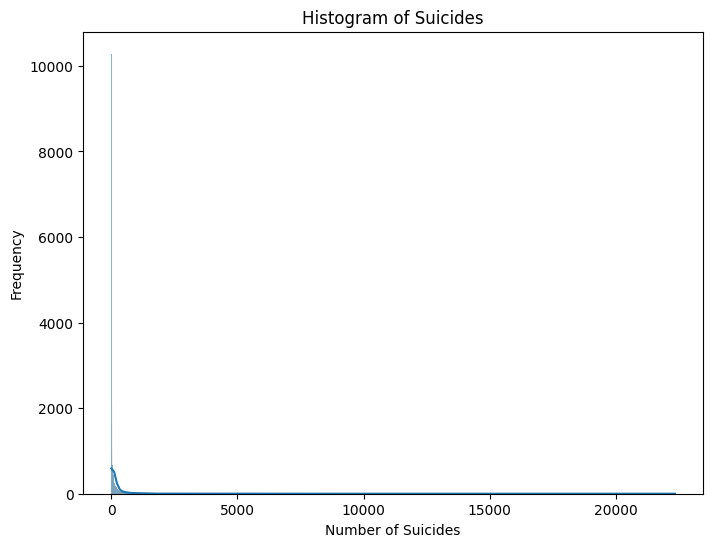

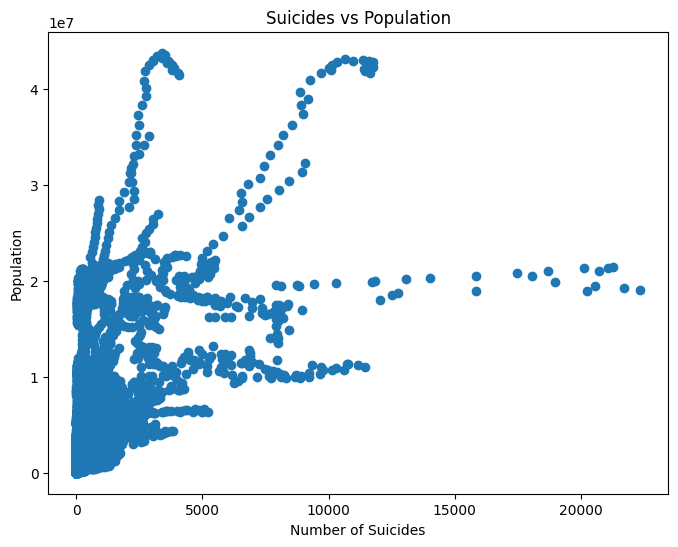

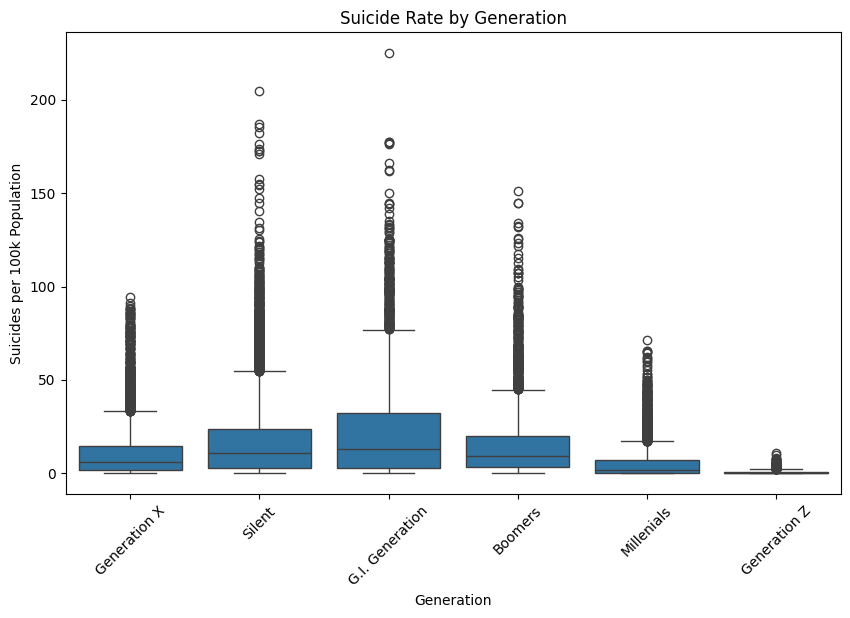

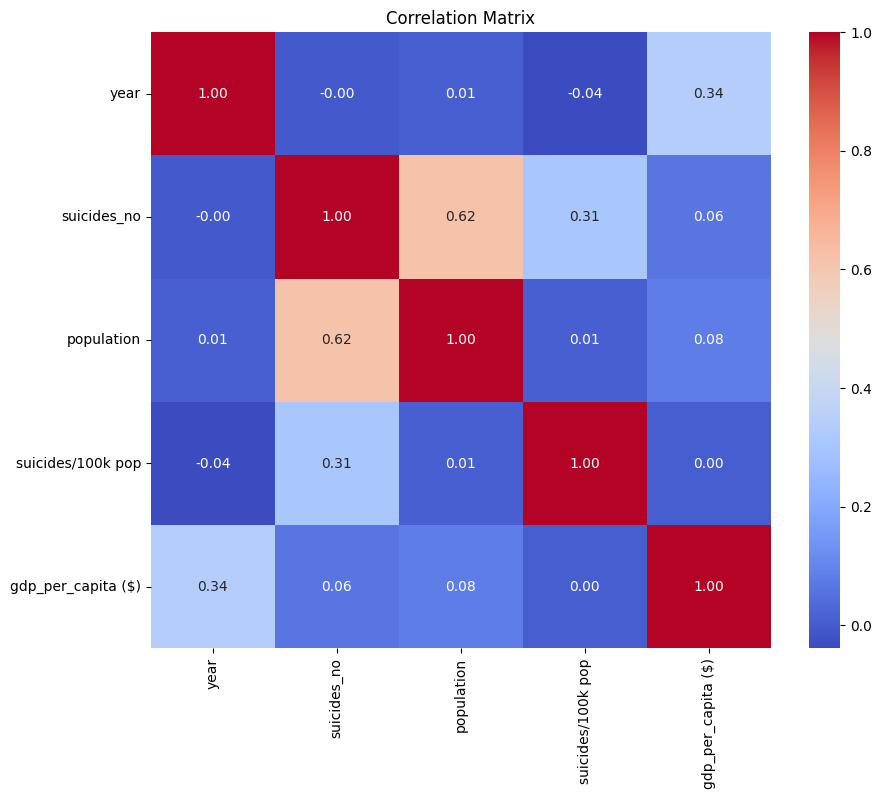

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the given path
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check for missing values
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Drop columns with more than 15% missing values
threshold = 0.15 * len(data)
data_cleaned = data.loc[:, data.isnull().sum() < threshold]

# Separate numeric and non-numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = data_cleaned.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Display the cleaned data (first 5 rows)
print("\n=== Cleaned Data (Preview) ===")
data_cleaned.head()

# ==========================
# Visualization Techniques
# ==========================

# Plot histogram for 'suicides_no' (numeric column)
if 'suicides_no' in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_cleaned['suicides_no'], kde=True)
    plt.title('Histogram of Suicides')
    plt.xlabel('Number of Suicides')
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot for 'suicides_no' vs 'population' (both numeric columns)
if 'suicides_no' in numeric_cols and 'population' in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_cleaned['suicides_no'], data_cleaned['population'])
    plt.title('Suicides vs Population')
    plt.xlabel('Number of Suicides')
    plt.ylabel('Population')
    plt.show()

# Box plot for suicide rates by 'generation' (categorical column)
if 'generation' in non_numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_cleaned, x='generation', y='suicides/100k pop')
    plt.title('Suicide Rate by Generation')
    plt.xlabel('Generation')
    plt.ylabel('Suicides per 100k Population')
    plt.xticks(rotation=45)
    plt.show()

# Heatmap for correlation matrix (if there are enough numeric columns)
corr_matrix = data_cleaned[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check for missing values
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Drop columns with more than 15% missing values
threshold = 0.15 * len(data)
data_cleaned = data.loc[:, data.isnull().sum() < threshold]

# Separate numeric and non-numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns

# Fill missing values for numeric columns with the mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Display cleaned data
print("\n=== Cleaned Data (Preview) ===")
print(data_cleaned.head())



=== Missing Values ===
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

=== Cleaned Data (Preview) ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0               6.71  Albania1987      2,156,624,900                 796   
1               5.19  Albania1987      2,156,6

C:\Users\Pranika Kumar\AppData\Local\Temp\ipykernel_25500\1271632912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Verify column names
print("Columns in dataset:", data.columns)

# Replace 'gdp_for_year' and 'suicides_no' with appropriate numeric columns from the Suicide dataset
if 'gdp_for_year ($)' in data.columns and 'suicides_no' in data.columns:
    # Bin the 'gdp_for_year ($)' column into categories
    bins = [0, 50000, 100000, 500000, 1000000]
    labels = ['Low', 'Medium', 'High', 'Luxury']
    data['GDP_Category'] = pd.cut(data['gdp_for_year ($)'], bins=bins, labels=labels, include_lowest=True)

    print("\n=== Head of 'GDP_Category' Column ===")
    print(data[['gdp_for_year ($)', 'GDP_Category']].head())

    # Box plot for 'suicides_no' across 'GDP_Category'
    sns.boxplot(x='GDP_Category', y='suicides_no', data=data)
    plt.title('Suicides Number by GDP Category')
    plt.xlabel('GDP Category')
    plt.ylabel('Number of Suicides')
    plt.show()
else:
    print("The dataset does not contain the required columns 'gdp_for_year ($)' and 'suicides_no'.")


Columns in dataset: Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
The dataset does not contain the required columns 'gdp_for_year ($)' and 'suicides_no'.



=== Missing Values ===
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

=== Outliers ===
             country  year     sex          age  suicides_no  population  \
4510          Brazil  2013    male  35-54 years         3053    25965164   
4522          Brazil  2014    male  35-54 years         3050    26475231   
4534          Brazil  2015    male  35-54 years         3238    26989063   
9172          France  1992    male  35-54 years         3029     7502100   
9183          France  1993    male  35-54 years         3210     7621500   
...              ...   ...     ...          ...          ...         ...   
27209  United States  2015    male  55-74 years         9068    32264697   
2

C:\Users\Pranika Kumar\AppData\Local\Temp\ipykernel_25500\1694369562.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())


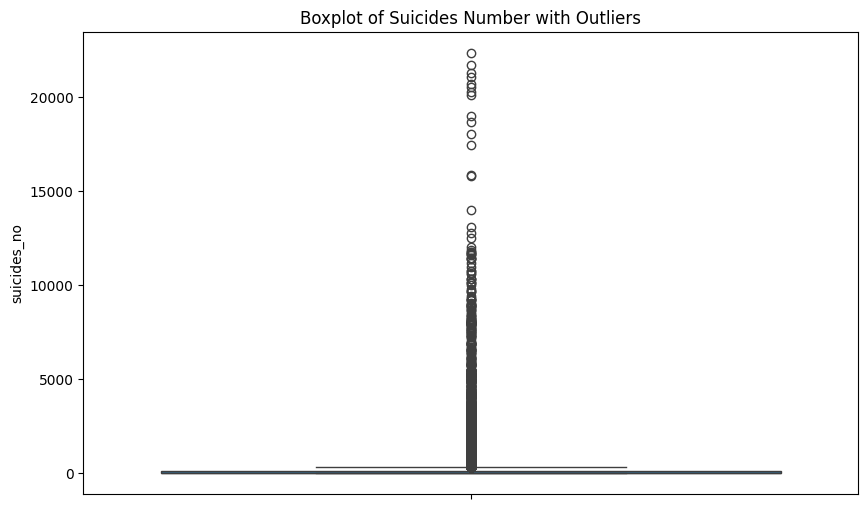


=== Data Without Outliers (Preview) ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0               6.71  Albania1987      2,156,624,900                 796   
1               5.19  Albania1987      2,156,624,900                 796   
2               4.83  Albania1987      2,156,624,900                 796   
3               4.59  Albania1987      2,156,624,900                 796   
4               3.28  Albania1987      2,156,624,900                 796   

        generation  z_score_suicides  
0     Generation X         -0.245639  
1           Silent         

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# =======================
# Handling Missing Values
# =======================
# Check for missing values
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Drop columns with more than 15% missing values
threshold = 0.15 * len(data)
data_cleaned = data.loc[:, data.isnull().sum() < threshold]

# Separate numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns

# Fill missing values for numeric columns with mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# ============================
# Outliers Detection using Z-Score
# ============================
# Choose a relevant column for outlier detection, e.g., 'suicides_no' or 'gdp_for_year ($)'
if 'suicides_no' in data_cleaned.columns:
    # Compute z-scores for 'suicides_no'
    data_cleaned['z_score_suicides'] = zscore(data_cleaned['suicides_no'])

    # Filter rows with z-scores above 3 or below -3
    outliers = data_cleaned[np.abs(data_cleaned['z_score_suicides']) > 3]
    print("\n=== Outliers ===")
    print(outliers)

    # Visualizing the outliers in the 'suicides_no' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(data_cleaned['suicides_no'])
    plt.title('Boxplot of Suicides Number with Outliers')
    plt.show()

    # Remove outliers and display the dataset
    data_no_outliers = data_cleaned[np.abs(data_cleaned['z_score_suicides']) <= 3]
    print("\n=== Data Without Outliers (Preview) ===")
    print(data_no_outliers.head())

else:
    print("The dataset does not contain the required column 'suicides_no'.")


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check the columns in the dataset
print("Columns in dataset:", data.columns)

# Ensure relevant columns exist (e.g., 'suicides_no' and 'gdp_for_year ($)')
if 'suicides_no' in data.columns and 'gdp_for_year ($)' in data.columns:
    # Convert 'gdp_for_year ($)' to numeric values, handling invalid formats
    data['gdp_numeric'] = pd.to_numeric(data['gdp_for_year ($)'], errors='coerce')

    # Drop rows with missing or invalid 'gdp_numeric' values
    data = data.dropna(subset=['gdp_numeric'])

    # Histogram for 'suicides_no'
    data['suicides_no'].plot(kind='hist', bins=20, edgecolor='black')
    plt.title('Histogram of Suicides')
    plt.xlabel('Suicides')
    plt.ylabel('Frequency')
    plt.show()

    # Linear regression plot: 'gdp_numeric' vs 'suicides_no'
    sns.lmplot(x='gdp_numeric', y='suicides_no', data=data, line_kws={'color': 'red'})
    plt.title('GDP vs Suicides with Linear Fit')
    plt.show()

    # Correlation Matrix for numerical columns
    numerical_data = data.select_dtypes(include=['number'])
    correlation_matrix = numerical_data.corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

else:
    print("The dataset does not contain the required columns 'suicides_no' or 'gdp_for_year ($)'.")


Columns in dataset: Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
The dataset does not contain the required columns 'suicides_no' or 'gdp_for_year ($)'.


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check for duplicates
print("\n=== Checking for Duplicates ===")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows
data_cleaned_dedup = data.drop_duplicates()

# Display the dataset after deduplication
print("\n=== Data After Deduplication ===")
print(data_cleaned_dedup.head())



=== Checking for Duplicates ===
Number of duplicate rows: 0

=== Data After Deduplication ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1    

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Ensure the 'Year' column exists (assuming 'Year' is the relevant column similar to 'Founded')
if 'Year' in data.columns:
    # Extract numeric values from 'Year' (assuming 'Year' is a column like 'Founded')
    data['Year_numeric'] = pd.to_numeric(data['Year'], errors='coerce')

    # Bin 'Year_numeric' into categories
    bins = [0, 1900, 1950, 2000, 2024]  # Adjust the bins as per the data
    labels = ['Early', 'Mid', 'Late', 'Modern']
    data['YearCategory'] = pd.cut(data['Year_numeric'], bins=bins, labels=labels, include_lowest=True)

    # Display the data after binning
    print("\n=== Data After Binning ===")
    print(data[['Year_numeric', 'YearCategory']].head())
else:
    print("The dataset does not contain the required 'Year' column.")


The dataset does not contain the required 'Year' column.


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check for duplicates
print("\n=== Checking for Duplicates ===")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows
data_cleaned_dedup = data.drop_duplicates()

# Display the cleaned data after deduplication
print("\n=== Data After Deduplication ===")
print(data_cleaned_dedup.head())



=== Checking for Duplicates ===
Number of duplicate rows: 0

=== Data After Deduplication ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1    

In [9]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Initialize the MLE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Identify numeric columns in the dataset
numeric_cols = data.select_dtypes(include=['number']).columns

# Perform imputation on the numeric columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Display the data after MLE imputation
print("\n=== Data After MLE Imputation ===")
print(data.head())



=== Data After MLE Imputation ===
   country    year     sex          age  suicides_no  population  \
0  Albania  1987.0    male  15-24 years         21.0    312900.0   
1  Albania  1987.0    male  35-54 years         16.0    308000.0   
2  Albania  1987.0  female  15-24 years         14.0    289700.0   
3  Albania  1987.0    male    75+ years          1.0     21800.0   
4  Albania  1987.0    male  25-34 years          9.0    274300.0   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987      0.681204      2,156,624,900   
1               5.19  Albania1987      0.680534      2,156,624,900   
2               4.83  Albania1987      0.680362      2,156,624,900   
3               4.59  Albania1987      0.680044      2,156,624,900   
4               3.28  Albania1987      0.679674      2,156,624,900   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2           

In [11]:
import pandas as pd  # Load the dataset

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Fill missing 'Column1' with the most frequent value (mode) (replace 'Column1' with actual column name in your dataset)
if 'Column1' in data.columns:
    data['Column1'] = data['Column1'].fillna(data['Column1'].mode()[0])

# Fill missing 'Column2' with the median (assuming it’s numeric or can be treated as such) (replace 'Column2' with actual column name)
if 'Column2' in data.columns:
    data['Column2'] = pd.to_numeric(data['Column2'], errors='coerce')
    data['Column2'] = data['Column2'].fillna(data['Column2'].median())

# Fill missing 'Column3' with the most frequent value (mode) (replace 'Column3' with actual column name)
if 'Column3' in data.columns:
    data['Column3'] = data['Column3'].fillna(data['Column3'].mode()[0])

# Print the data after imputation
print("\n=== Data After Imputation ===")
print(data.head())



=== Data After Imputation ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Ge

In [12]:
import pandas as pd  # Load the dataset

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Replacing specific values in 'Location' column (replace 'Location' with the actual column name in your dataset)
if 'Location' in data.columns:
    data['Location'] = data['Location'].replace('Old Location', 'New Location')

# Example: Replace values in 'Year' column where the year is before 1900 with 'Old Year' (replace 'Year' with the actual column name)
if 'Year' in data.columns:
    data['Year'] = data['Year'].apply(lambda x: 'Old Year' if pd.to_numeric(x, errors='coerce') < 1900 else x)

# Print the data after value replacement
print("\n=== Data After Value Replacement ===")
print(data.head())



=== Data After Value Replacement ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Load the dataset
try:
    data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')
except FileNotFoundError:
    print("The specified file was not found.")
    exit()

# Check the first few rows of the dataset to understand its structure
print(data.head())

# Display the column names
print("\n=== Column Names ===")
print(data.columns)

# Strip any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Check the updated column names
print("\n=== Updated Column Names ===")
print(data.columns)

# Check for potential column names that might be similar to 'Year'
for col in data.columns:
    print(f"Column: '{col}'")

# If 'Year' and 'Suicides' exist, convert them to numeric
if 'Year' in data.columns and 'Suicides' in data.columns:
    data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
    data['Suicides'] = pd.to_numeric(data['Suicides'], errors='coerce')

    # Summary statistics for the 'Year' column
    print("\n=== Univariate Analysis: Summary Statistics for 'Year' ===")
    print(data['Year'].describe())

    # Histogram for 'Year'
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Year'], kde=True, bins=30)
    plt.title('Univariate Analysis - Histogram of Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'Year'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Year'])
    plt.title('Univariate Analysis - Boxplot of Year')
    plt.show()

    # Summary statistics for the 'Suicides' column
    print("\n=== Univariate Analysis: Summary Statistics for 'Suicides' ===")
    print(data['Suicides'].describe())

    # Histogram for 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Suicides'], kde=True, bins=30)
    plt.title('Univariate Analysis - Histogram of Suicides')
    plt.xlabel('Suicides')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Suicides'])
    plt.title('Univariate Analysis - Boxplot of Suicides')
    plt.show()
else:
    print("The columns 'Year' or 'Suicides' do not exist in the DataFrame.")

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')
except FileNotFoundError:
    print("The specified file was not found.")
    exit()

# Print column names to check the exact column names
print("\n=== Column Names ===")
print(data.columns)

# Check if the relevant columns exist in the DataFrame
if 'Year_of_Death' in data.columns and 'Suicides' in data.columns:
    # Preprocess 'Year_of_Death' and 'Suicides' to ensure they are numeric
    data['Year_of_Death'] = pd.to_numeric(data['Year_of_Death'], errors='coerce')  # Ensure 'Year_of_Death' is numeric
    data['Suicides'] = pd.to_numeric(data['Suicides'], errors='coerce')  # Ensure 'Suicides' is numeric

    # Drop rows with missing values in 'Year_of_Death' or 'Suicides'
    data = data.dropna(subset=['Year_of_Death', 'Suicides'])

    # Scatter plot for 'Year_of_Death' vs 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['Year_of_Death'], y=data['Suicides'], alpha=0.6)
    plt.title('Bivariate Analysis - Scatter Plot of Year of Death vs Suicides')
    plt.xlabel('Year of Death')
    plt.ylabel('Suicides')
    plt.show()

    # Correlation coefficient between 'Year_of_Death' and 'Suicides'
    correlation = data[['Year_of_Death', 'Suicides']].corr()
    print("\n=== Bivariate Analysis: Correlation Between 'Year_of_Death' and 'Suicides' ===")
    print(correlation)

    # Linear Regression Plot for 'Year_of_Death' vs 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.lmplot(x='Year_of_Death', y='Suicides', data=data)
    plt.title('Bivariate Analysis - Linear Regression of Year of Death vs Suicides')
    plt.show()
else:
    print("The required columns 'Year_of_Death' and 'Suicides' do not exist in the DataFrame.")


=== Column Names ===
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
The required columns 'Year_of_Death' and 'Suicides' do not exist in the DataFrame.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')
except FileNotFoundError:
    print("The specified file was not found.")
    exit()

# Print the first few rows of the DataFrame to understand its structure
print("\n=== DataFrame Head ===")
print(data.head())

# Print column names to check for exact column names
print("\n=== Column Names ===")
print(data.columns)

# Check for leading/trailing spaces in column names and strip them
data.columns = data.columns.str.strip()

# Print updated column names
print("\n=== Updated Column Names ===")
print(data.columns)

# Check if the relevant columns exist in the DataFrame
if 'Year_of_Death' in data.columns and 'Suicides' in data.columns:
    # Preprocess 'Year_of_Death' and 'Suicides' to ensure they are numeric
    data['Year_of_Death'] = pd.to_numeric(data['Year_of_Death'], errors='coerce')  # Ensure 'Year_of_Death' is numeric
    data['Suicides'] = pd.to_numeric(data['Suicides'], errors='coerce')  # Ensure 'Suicides' is numeric

    # Drop rows with missing values in 'Year_of_Death' or 'Suicides'
    data = data.dropna(subset=['Year_of_Death', 'Suicides'])

    # Scatter plot for 'Year_of_Death' vs 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['Year_of_Death'], y=data['Suicides'], alpha=0.6)
    plt.title('Bivariate Analysis - Scatter Plot of Year of Death vs Suicides')
    plt.xlabel('Year of Death')
    plt.ylabel('Suicides')
    plt.show()

    # Correlation coefficient between 'Year_of_Death' and 'Suicides'
    correlation = data[['Year_of_Death', 'Suicides']].corr()
    print("\n=== Bivariate Analysis: Correlation Between 'Year_of_Death' and 'Suicides' ===")
    print(correlation)

    # Linear Regression Plot for 'Year_of_Death' vs 'Suicides'
    plt.figure(figsize=(8, 6))
    sns.lmplot(x='Year_of_Death', y='Suicides', data=data)
    plt.title('Bivariate Analysis - Linear Regression of Year of Death vs Suicides')
    plt.show()
else:
    print("The required columns 'Year_of_Death' and 'Suicides' do not exist in the DataFrame.")


=== DataFrame Head ===
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generatio

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

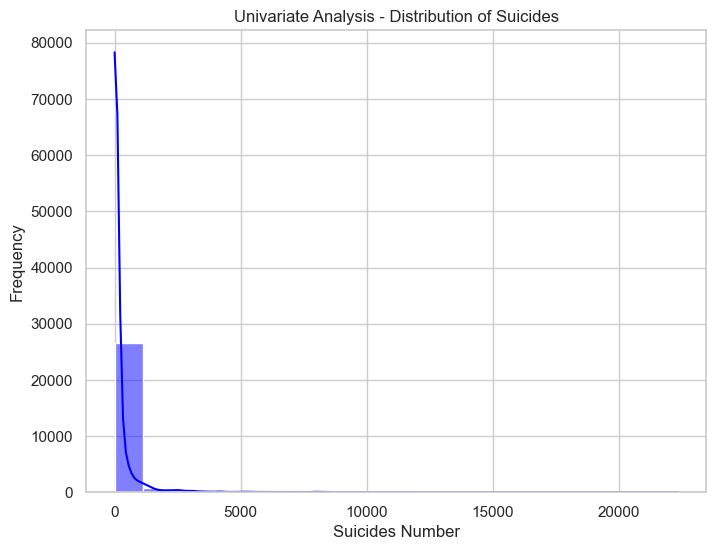

KeyError: 'gdp_for_year ($)'

<Figure size 800x600 with 0 Axes>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check the first few rows of the dataset
print(data.head())

# Summary statistics for the dataset
print("\n=== Summary Statistics ===")
print(data.describe())

# Univariate Analysis for 'suicides_no'
plt.figure(figsize=(8, 6))
sns.histplot(data['suicides_no'], kde=True, bins=20, color='blue')
plt.title('Univariate Analysis - Distribution of Suicides')
plt.xlabel('Suicides Number')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis for 'gdp_for_year'
plt.figure(figsize=(8, 6))
sns.histplot(data['gdp_for_year ($)'], kde=True, bins=20, color='green')
plt.title('Univariate Analysis - Distribution of GDP for Year')
plt.xlabel('GDP for Year')
plt.ylabel('Frequency')
plt.show()


In [13]:
pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 991.0 kB/s eta 0:00:10
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/9.9 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.9 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:10
   -- -----------


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install statsmodels



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


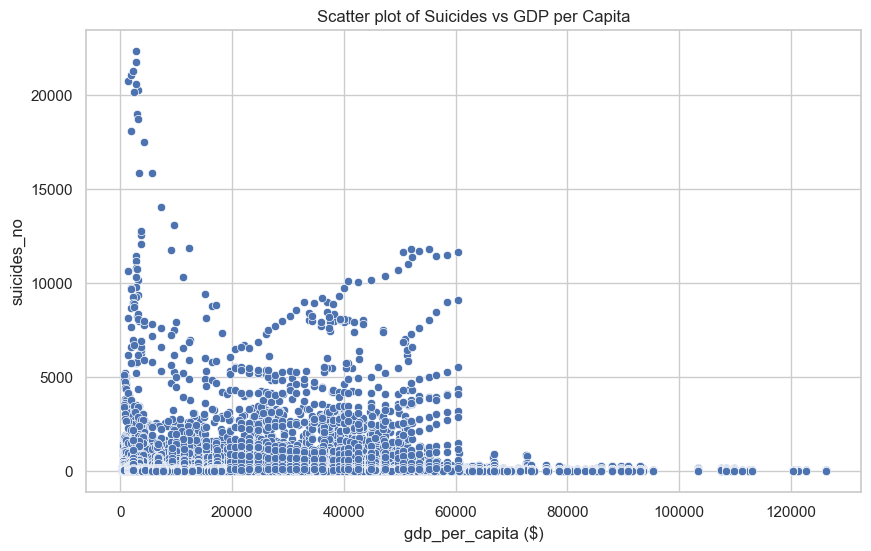

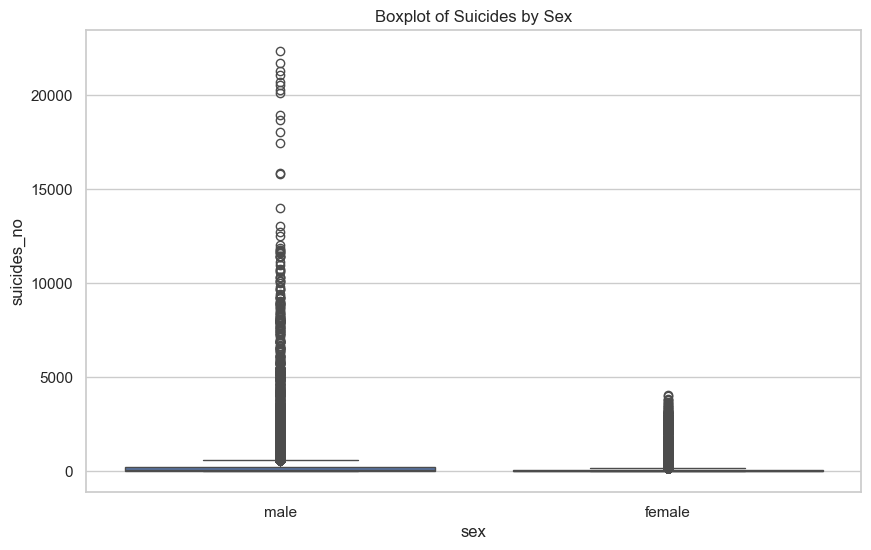

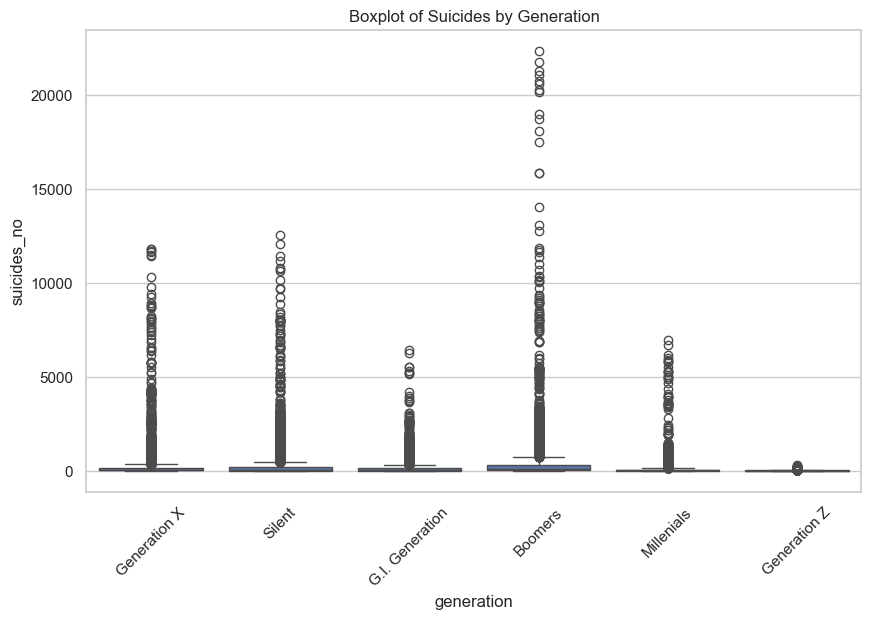

In [20]:
# Bivariate Analysis: Numerical vs Numerical
# Scatter plot for suicides_no vs gdp_per_capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdp_per_capita ($)', y='suicides_no')
plt.title('Scatter plot of Suicides vs GDP per Capita')
plt.show()

# Bivariate Analysis: Categorical vs Numerical
# Boxplot for suicides_no by sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='sex', y='suicides_no')
plt.title('Boxplot of Suicides by Sex')
plt.show()

# Boxplot for suicides_no by generation
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='generation', y='suicides_no')
plt.title('Boxplot of Suicides by Generation')
plt.xticks(rotation=45)
plt.show()


In [23]:
import pandas as pd

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Display the first few rows to check the structure
print(data.head())


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

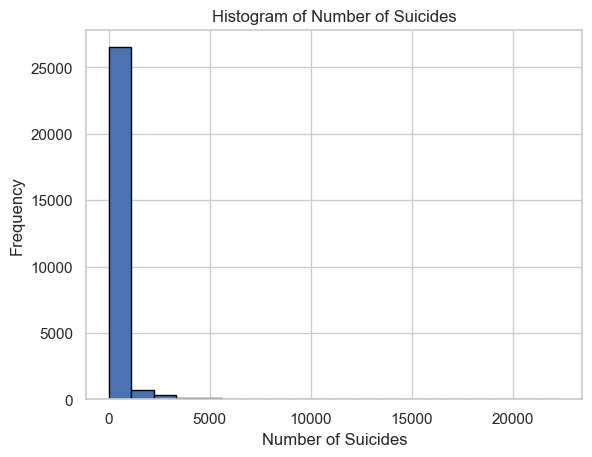

In [24]:
import matplotlib.pyplot as plt

# Plot histogram for 'suicides_no'
plt.hist(data['suicides_no'], bins=20, edgecolor='black')
plt.title('Histogram of Number of Suicides')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()


In [25]:
print(data['suicides_no'].describe())


count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

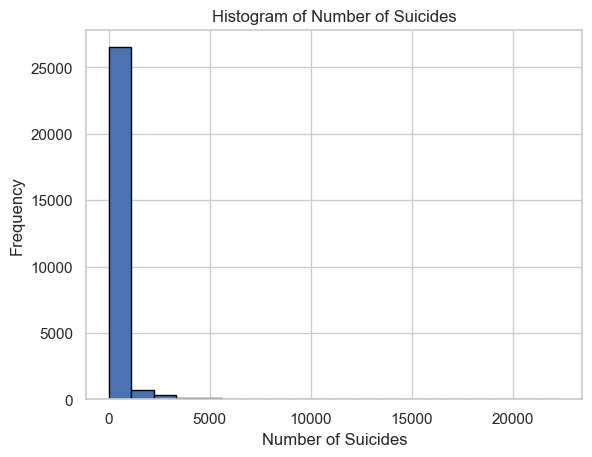

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64


KeyError: 'gdp_for_year ($)'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Display the first few rows
print(data.head())

# Univariate Analysis: Histogram for 'suicides_no'
plt.hist(data['suicides_no'], bins=20, edgecolor='black')
plt.title('Histogram of Number of Suicides')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for 'suicides_no'
print(data['suicides_no'].describe())

# Bivariate Analysis: Scatter plot of 'suicides_no' vs 'gdp_for_year ($)'
plt.scatter(data['gdp_for_year ($)'], data['suicides_no'], alpha=0.5)
plt.title('Scatter Plot: Suicides vs GDP for Year')
plt.xlabel('GDP for Year ($)')
plt.ylabel('Number of Suicides')
plt.show()

# Correlation between 'suicides_no' and 'gdp_for_year ($)'
correlation = data[['suicides_no', 'gdp_for_year ($)']].corr()
print(correlation)

# Multivariate Analysis: Pairplot for 'suicides_no', 'gdp_for_year ($)', 'suicides/100k pop'
selected_columns = ['suicides_no', 'gdp_for_year ($)', 'suicides/100k pop']
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot: Suicides, GDP, and Suicide Rate', y=1.02)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Suicides, GDP, and Suicide Rate')
plt.show()

# Multiple Linear Regression Model
X = data[['gdp_for_year ($)', 'suicides/100k pop', 'population']]  # Independent variables
y = data['suicides_no']  # Dependent variable

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Example of filtering data for a specific country (Albania)
albania_data = data[data['country'] == 'Albania']
print(albania_data.head())


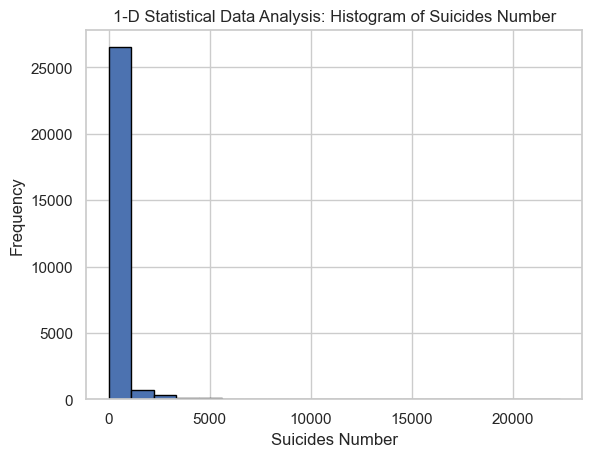

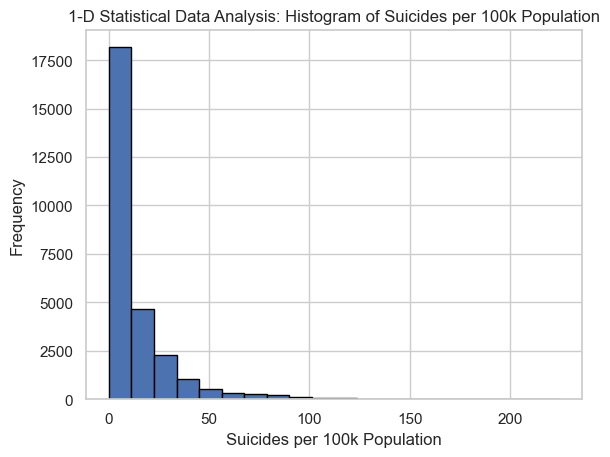

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Univariate Analysis: Histogram for 'suicides_no'
if 'suicides_no' in data.columns:
    plt.hist(data['suicides_no'], bins=20, edgecolor='black')
    plt.title('1-D Statistical Data Analysis: Histogram of Suicides Number')
    plt.xlabel('Suicides Number')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The column 'suicides_no' is missing.")

# Univariate Analysis: Histogram for 'suicides/100k pop'
if 'suicides/100k pop' in data.columns:
    plt.hist(data['suicides/100k pop'], bins=20, edgecolor='black')
    plt.title('1-D Statistical Data Analysis: Histogram of Suicides per 100k Population')
    plt.xlabel('Suicides per 100k Population')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The column 'suicides/100k pop' is missing.")


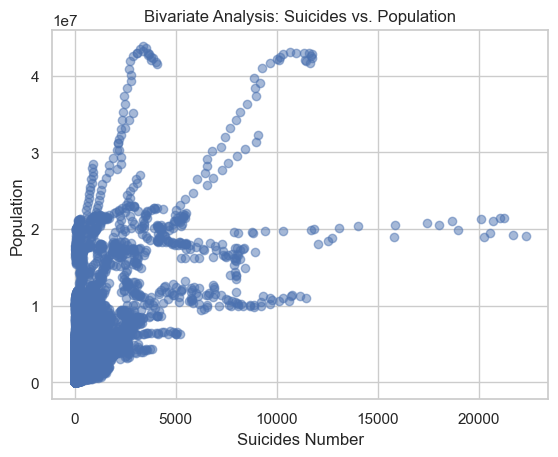

In [35]:
# Bivariate Analysis: Scatter plot between 'suicides_no' and 'population'
if 'suicides_no' in data.columns and 'population' in data.columns:
    plt.scatter(data['suicides_no'], data['population'], alpha=0.5)
    plt.title('Bivariate Analysis: Suicides vs. Population')
    plt.xlabel('Suicides Number')
    plt.ylabel('Population')
    plt.show()
else:
    print("One or both columns ('suicides_no', 'population') are missing.")


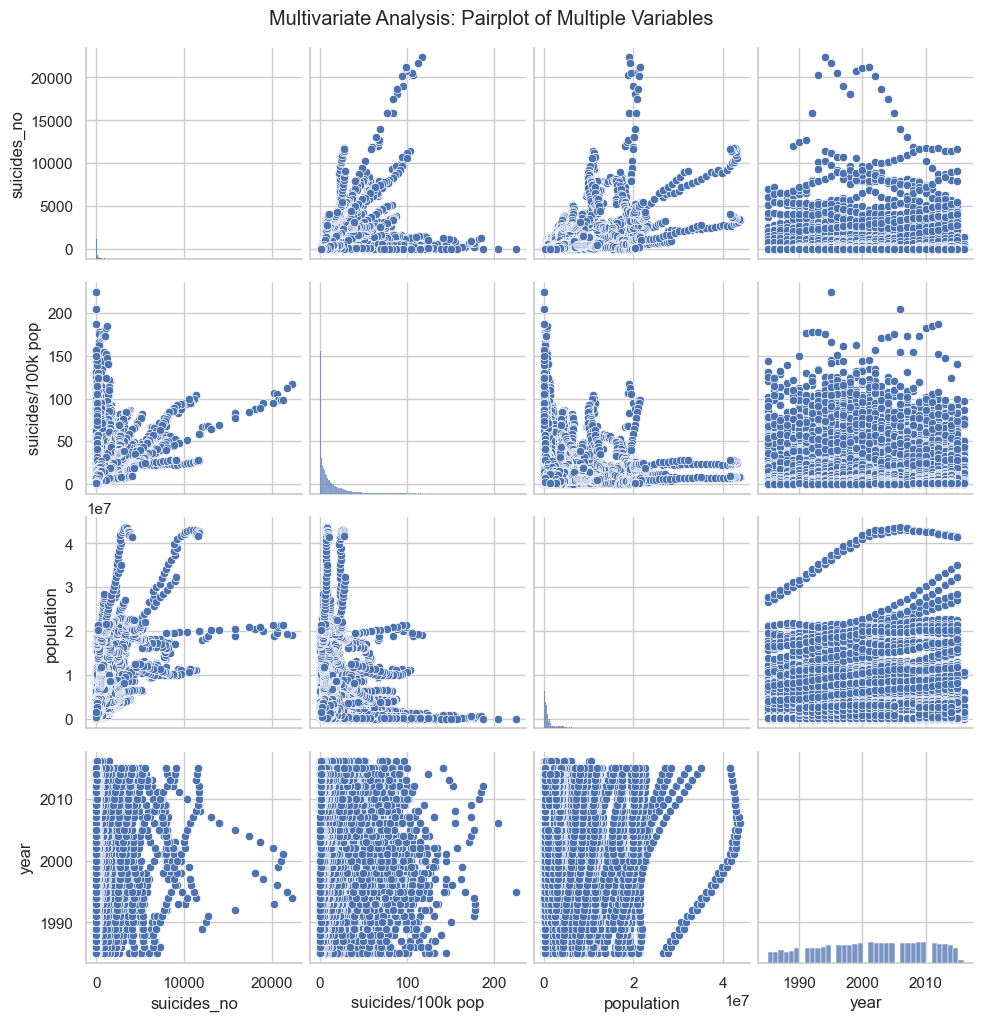

In [37]:
import seaborn as sns

# Multivariate Analysis: Pairplot for multiple variables
columns = ['suicides_no', 'suicides/100k pop', 'population', 'year']
data_cleaned = data[columns].dropna()  # Drop rows with NaN values in the selected columns

# Check if all required columns are available
if all(col in data_cleaned.columns for col in columns):
    sns.pairplot(data_cleaned)
    plt.suptitle('Multivariate Analysis: Pairplot of Multiple Variables', y=1.02)
    plt.show()
else:
    print("One or more required columns are missing for pairplot.")


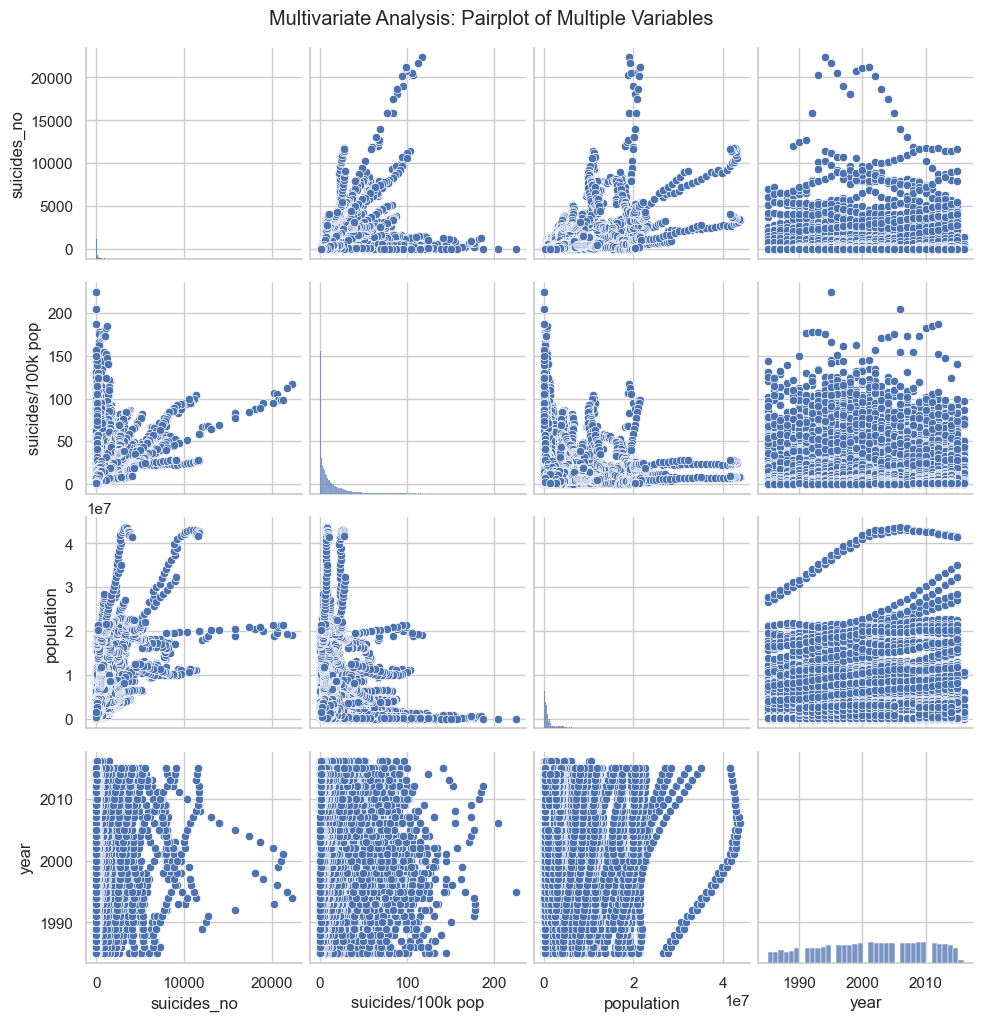

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Select the columns for multivariate analysis
columns = ['suicides_no', 'suicides/100k pop', 'population', 'year']

# Clean the data by removing rows with NaN values in the selected columns
data_cleaned = data[columns].dropna()

# Check if all required columns are available
if all(col in data_cleaned.columns for col in columns):
    # Create pairplot for the selected columns
    sns.pairplot(data_cleaned)
    plt.suptitle('Multivariate Analysis: Pairplot of Multiple Variables', y=1.02)
    plt.show()
else:
    print("One or more required columns are missing for pairplot.")


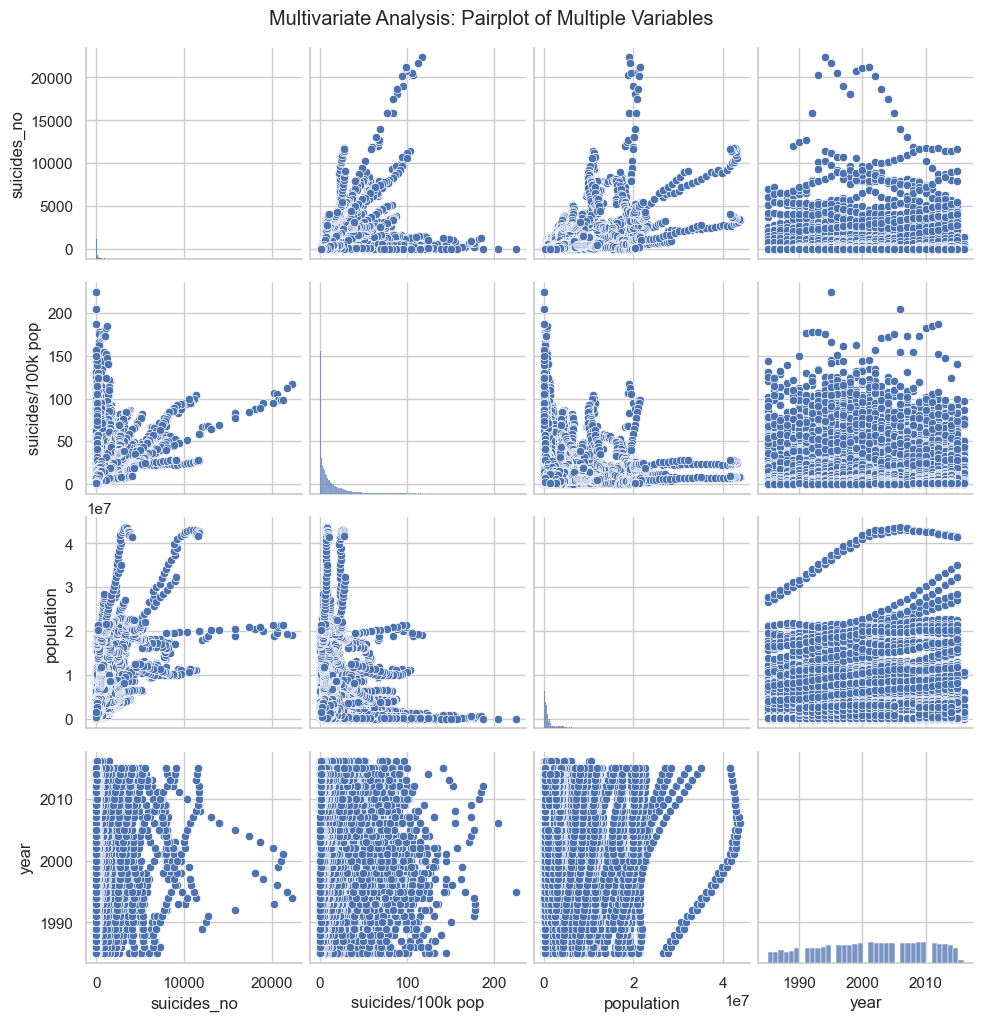

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Select the columns for multivariate analysis
columns = ['suicides_no', 'suicides/100k pop', 'population', 'year']

# Clean the data by removing rows with NaN values in the selected columns
data_cleaned = data[columns].dropna()

# Check if all required columns are available
if all(col in data_cleaned.columns for col in columns):
    # Create pairplot for the selected columns
    sns.pairplot(data_cleaned)
    plt.suptitle('Multivariate Analysis: Pairplot of Multiple Variables', y=1.02)
    plt.show()
else:
    print("One or more required columns are missing for pairplot.")


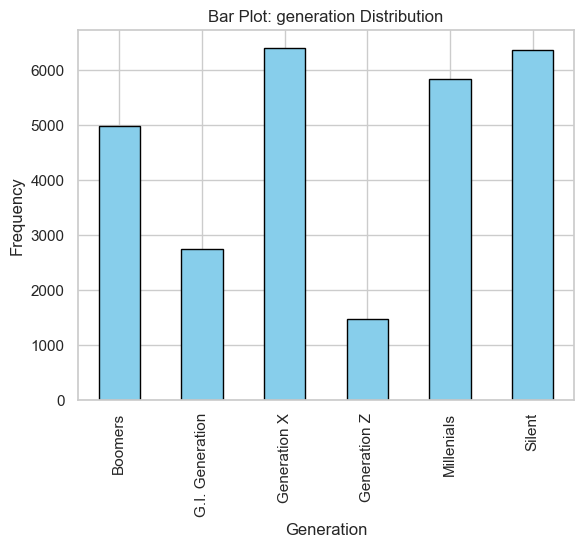

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Select a categorical column (e.g., 'sex' or 'generation')
categorical_column = 'generation'  # You can change this to 'sex' or 'country'

# Check if the selected column exists in the dataset
if categorical_column in data.columns:
    # Plot a bar plot for the selected categorical column
    data[categorical_column].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot: {categorical_column} Distribution')
    plt.xlabel(categorical_column.capitalize())
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"The column '{categorical_column}' is missing.")


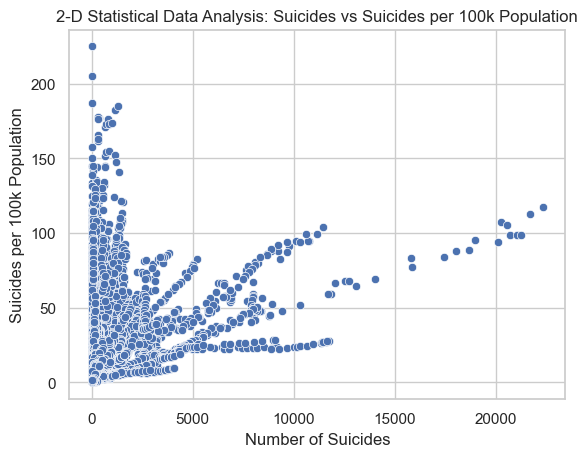

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# 2-D analysis: Scatter plot of 'suicides_no' vs 'suicides/100k pop'
if 'suicides_no' in data.columns and 'suicides/100k pop' in data.columns:
    sns.scatterplot(x=data['suicides_no'], y=data['suicides/100k pop'])
    plt.title('2-D Statistical Data Analysis: Suicides vs Suicides per 100k Population')
    plt.xlabel('Number of Suicides')
    plt.ylabel('Suicides per 100k Population')
    plt.show()
else:
    print("Required columns 'suicides_no' and 'suicides/100k pop' are missing.")


In [42]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Contingency table: Example using categorical columns
if 'sex' in data.columns and 'generation' in data.columns:
    # Creating a contingency table for 'sex' vs 'generation'
    contingency_table = pd.crosstab(data['sex'], data['generation'])
    
    print("\n=== Contingency Table ===")
    print(contingency_table)
else:
    print("The required columns 'sex' and 'generation' are missing.")



=== Contingency Table ===
generation  Boomers  G.I. Generation  Generation X  Generation Z  Millenials  \
sex                                                                            
female         2495             1372          3204           735        2922   
male           2495             1372          3204           735        2922   

generation  Silent  
sex                 
female        3182  
male          3182  


In [43]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Convert 'suicides_no' and 'population' columns to numeric, forcing errors to NaN
data['suicides_no'] = pd.to_numeric(data['suicides_no'], errors='coerce')
data['population'] = pd.to_numeric(data['population'], errors='coerce')

# Check if the columns are now numeric and perform the calculation
if 'suicides_no' in data.columns and 'population' in data.columns:
    # Ensure there are no NaN values before calculation
    data['suicides per capita'] = data['suicides_no'] / (data['population'] + 1)
    
    # Display the first few rows of the new column
    print("\n=== Data Elaboration: Suicides per Capita ===")
    print(data[['suicides_no', 'population', 'suicides per capita']].head())
else:
    print("Required columns 'suicides_no' and 'population' are missing.")



=== Data Elaboration: Suicides per Capita ===
   suicides_no  population  suicides per capita
0           21      312900             0.000067
1           16      308000             0.000052
2           14      289700             0.000048
3            1       21800             0.000046
4            9      274300             0.000033


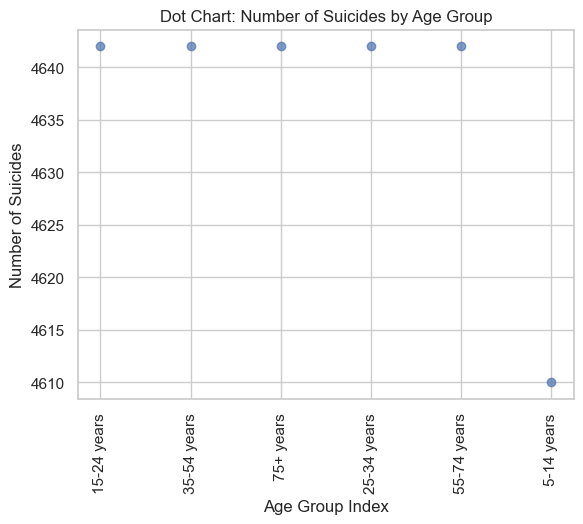

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Count the number of suicides by age group (or 'sex' if you prefer)
age_counts = data['age'].value_counts()

# Plot the count of suicides by age group as a dot chart
plt.plot(age_counts, 'o', alpha=0.7)

# Title and labels for the chart
plt.title('Dot Chart: Number of Suicides by Age Group')
plt.xlabel('Age Group Index')
plt.ylabel('Number of Suicides')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


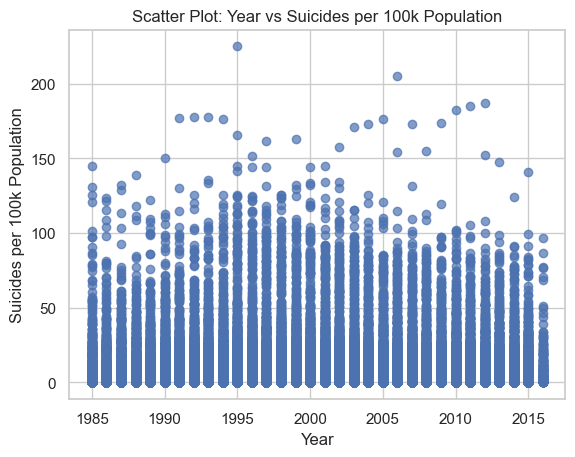

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Convert 'year' and 'suicides/100k pop' columns to numeric (if they're in text form, handle them as numbers)
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['suicides/100k pop'] = pd.to_numeric(data['suicides/100k pop'], errors='coerce')

# Check if the necessary columns exist
if 'year' in data.columns and 'suicides/100k pop' in data.columns:
    # Scatter plot: 'year' vs 'suicides/100k pop'
    plt.scatter(data['year'], data['suicides/100k pop'], alpha=0.7)
    plt.title('Scatter Plot: Year vs Suicides per 100k Population')
    plt.xlabel('Year')
    plt.ylabel('Suicides per 100k Population')
    plt.show()
else:
    print("Required columns 'year' and 'suicides/100k pop' are missing.")


In [47]:
import pandas as pd

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Convert relevant columns to numeric (if they're in text form, handle it as a number)
data['suicides_no'] = pd.to_numeric(data['suicides_no'], errors='coerce')
data['suicides/100k pop'] = pd.to_numeric(data['suicides/100k pop'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Display summary statistics for numeric columns
print("\n=== Statistical Summary Measures ===")
print(data.describe())



=== Statistical Summary Measures ===
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.0000

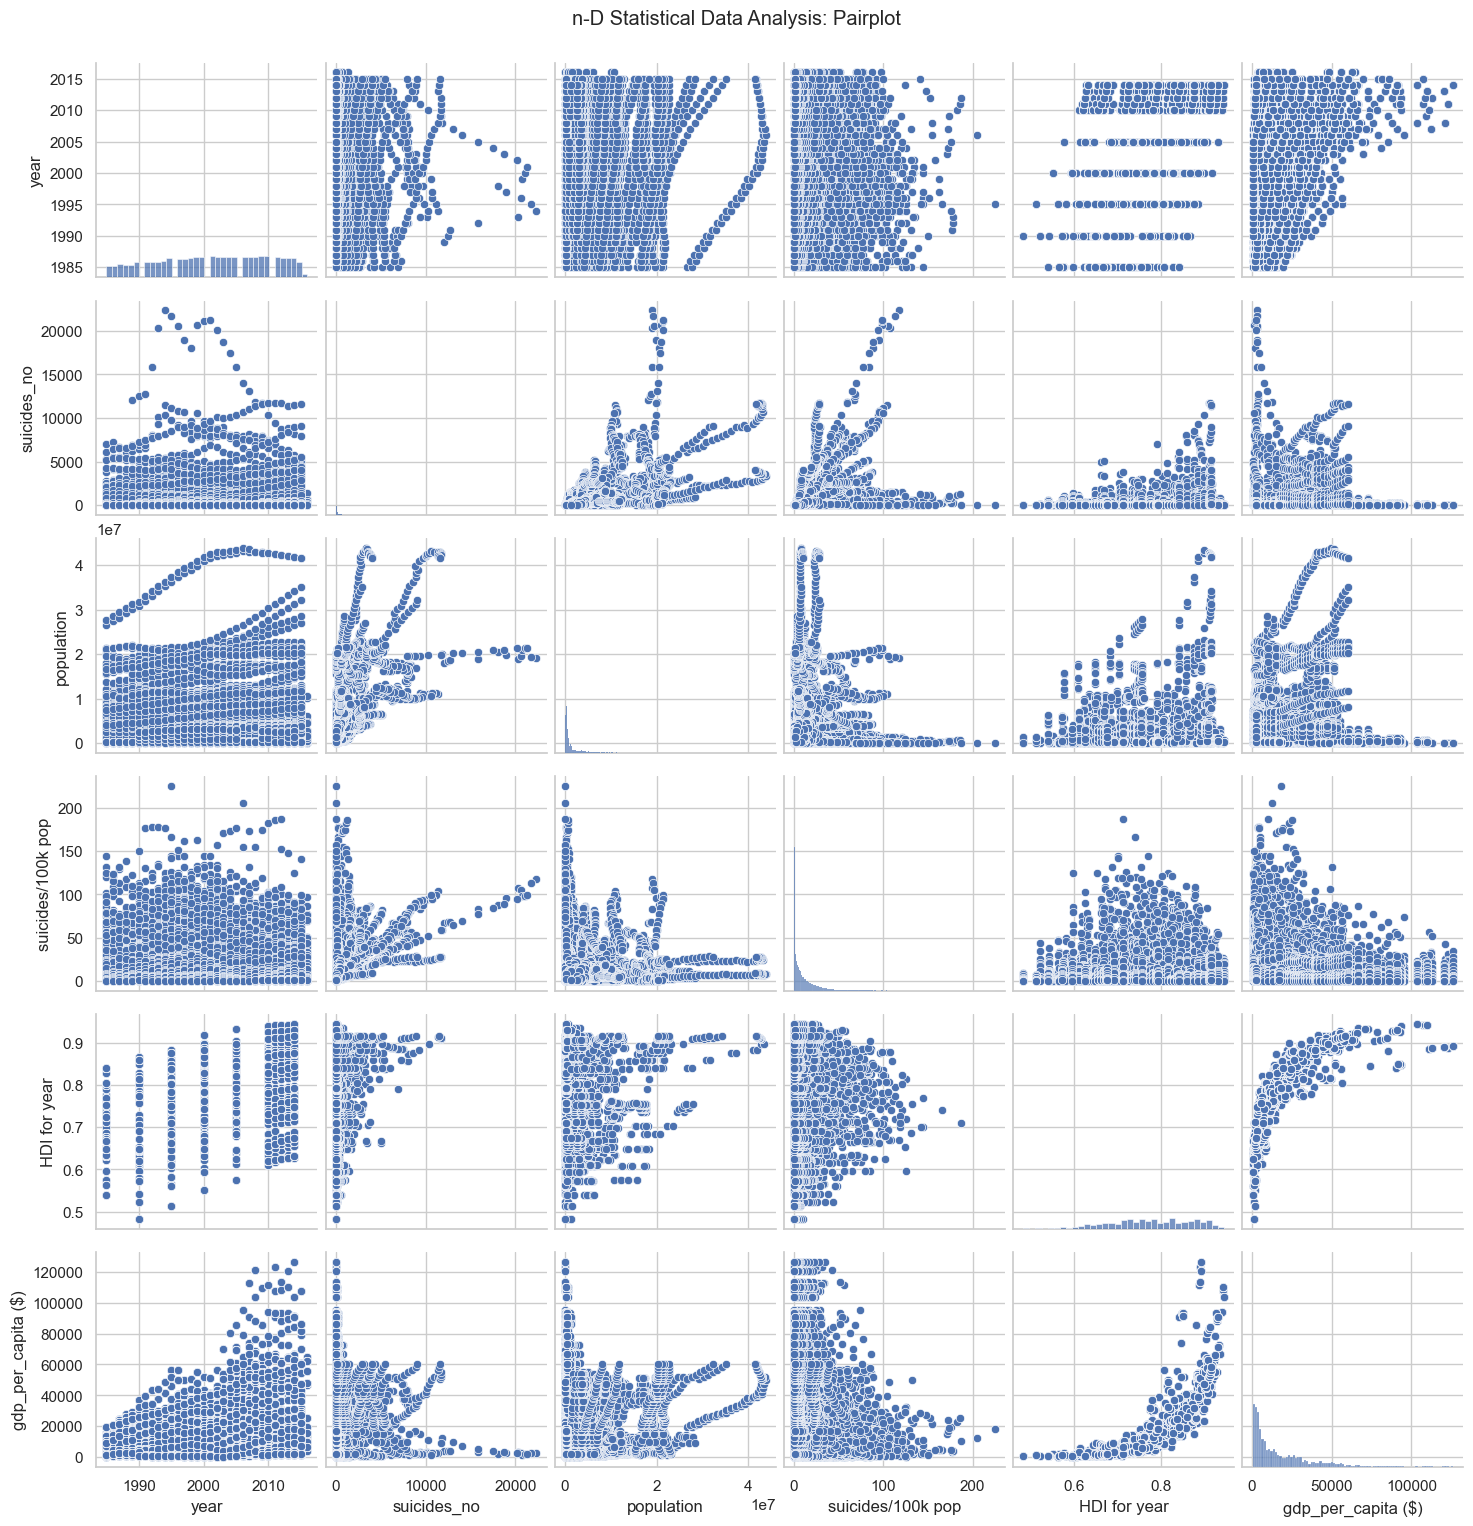

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Select numeric columns for the pairplot (assuming the relevant columns are numeric)
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if there are enough numeric columns for pairplot
if len(numeric_columns) >= 2:
    sns.pairplot(data[numeric_columns])
    plt.suptitle('n-D Statistical Data Analysis: Pairplot', y=1.02)
    plt.show()
else:
    print("The dataset does not have enough numeric columns for n-D analysis.")


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check if there is a textual column (e.g., 'country', 'region', etc.) for clustering
# Assuming 'country' or any other textual column exists in the dataset
if 'country' in data.columns:  # Replace 'country' with the actual column if necessary
    # Vectorize the textual data
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['country'].dropna())  # Dropping NaN values
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=0)
    labels = kmeans.fit_predict(X)
    
    # Add cluster labels to the dataset
    data['Cluster'] = labels
    
    print("\n=== Document Clustering Results ===")
    print(data[['country', 'Cluster']].head())  # Replace 'country' with the appropriate column name if necessary
else:
    print("The column 'country' is missing.")



=== Document Clustering Results ===
   country  Cluster
0  Albania        0
1  Albania        0
2  Albania        0
3  Albania        0
4  Albania        0


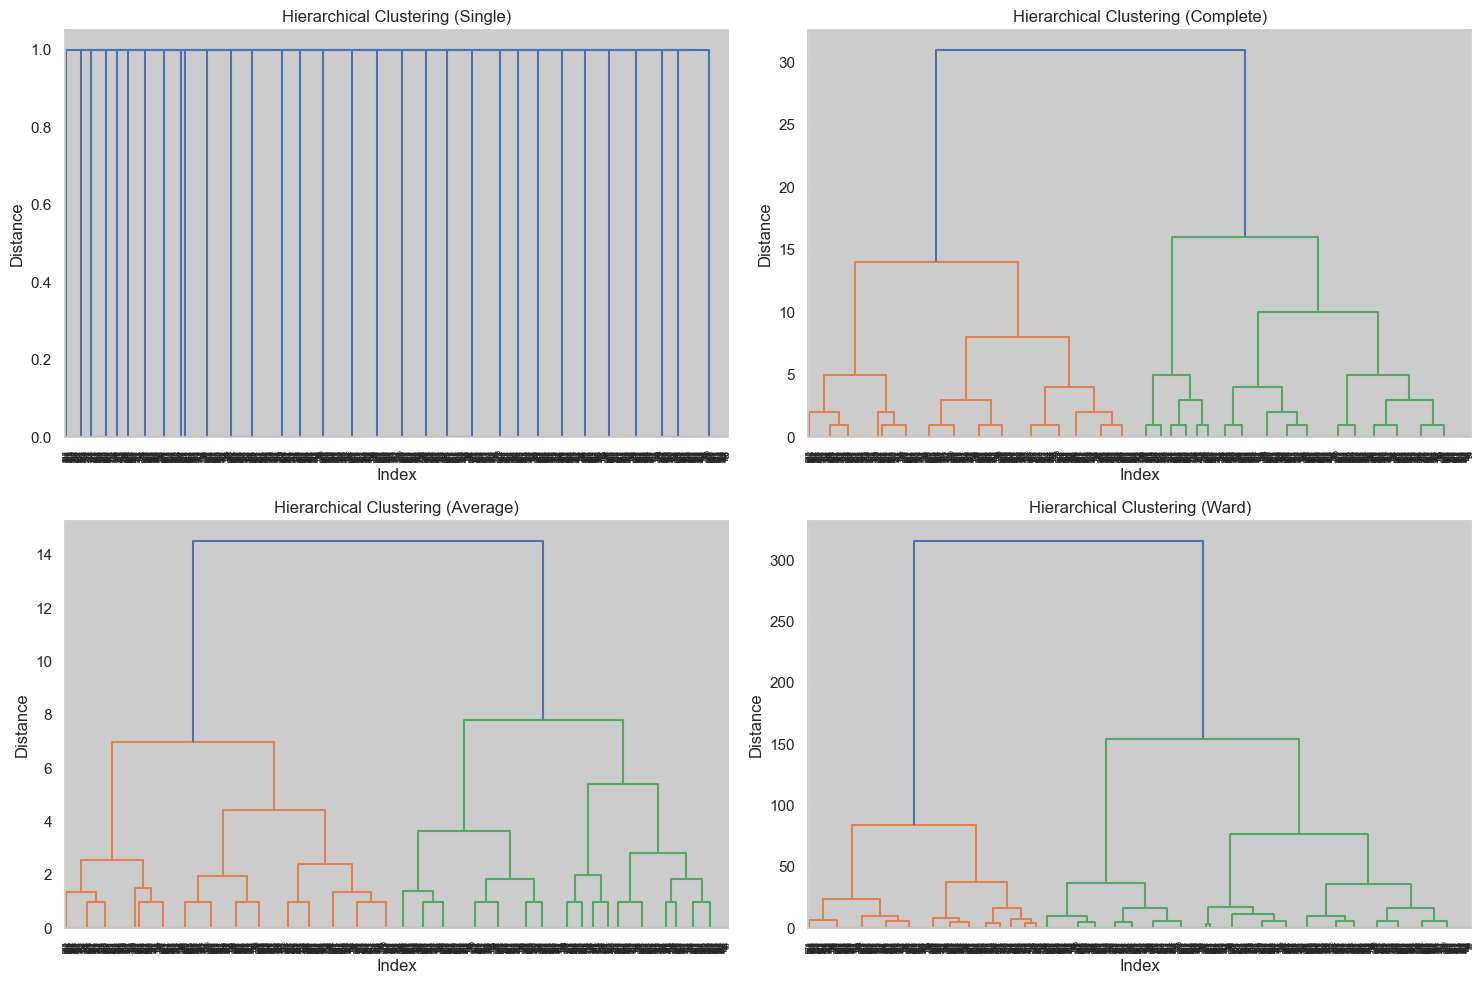

In [50]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the suicide dataset
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Clean the 'year' column to extract numeric values (if necessary)
if 'year' in data.columns:
    # Drop rows where 'year' is NaN (ensure the data is clean)
    features = data[['year']].dropna()

    # Downsample the data to 1000 points (if there are enough rows)
    if len(features) >= 1000:
        features_sampled = features.sample(1000, random_state=0)
    else:
        features_sampled = features

    # List of linkage methods to compare
    linkage_methods = ['single', 'complete', 'average', 'ward']

    # Plot dendrograms for each method
    plt.figure(figsize=(15, 10))

    for i, method in enumerate(linkage_methods, 1):
        # Compute linkage for the current method
        Z = linkage(features_sampled, method=method)

        # Create a subplot for each dendrogram
        plt.subplot(2, 2, i)
        dendrogram(Z)
        plt.title(f'Hierarchical Clustering ({method.capitalize()})')
        plt.xlabel('Index')
        plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

else:
    print("The 'year' column is missing.")


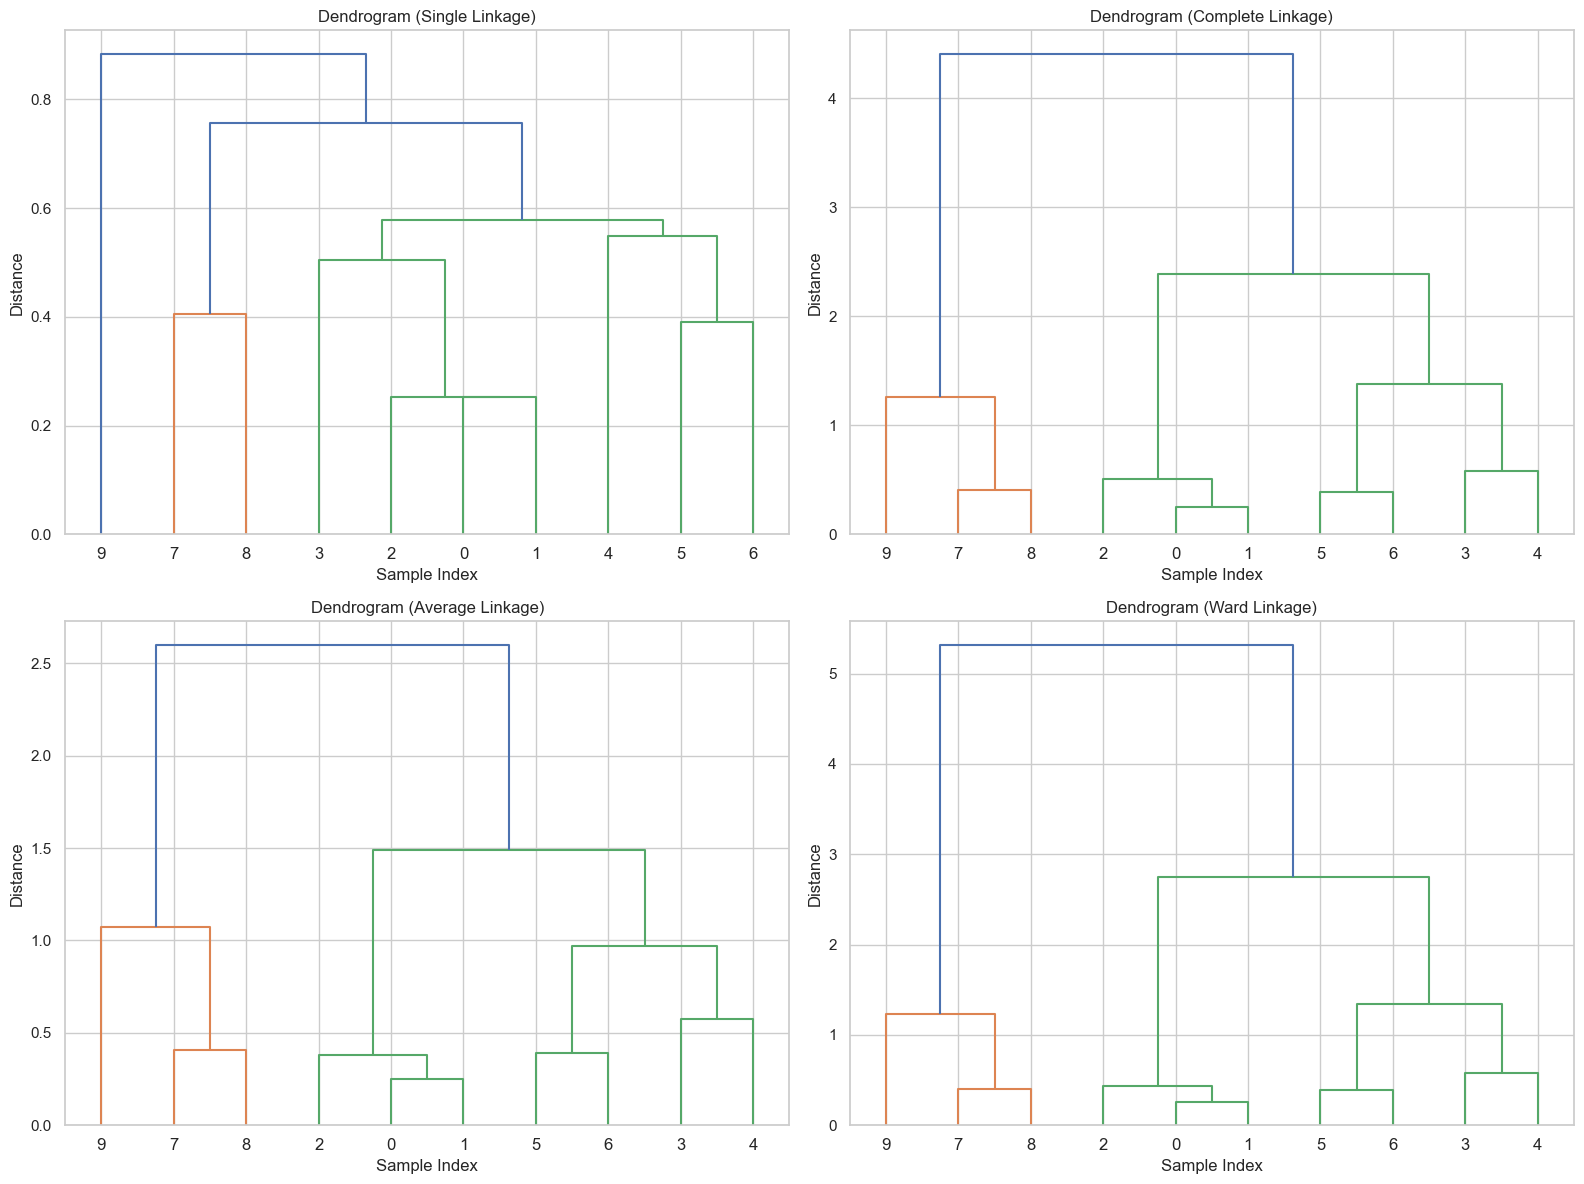

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Create a fixed dataset of points (for example, 10 points in a 2D space)
fixed_data = np.array([[1, 2], 
                       [2, 3], 
                       [3, 4], 
                       [5, 6], 
                       [8, 7], 
                       [9, 10], 
                       [10, 12], 
                       [13, 15], 
                       [15, 16], 
                       [18, 20]])

# Optionally, scale the data to standardize the features (important if the scale varies)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fixed_data)

# Generate dendrograms for different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(16, 12))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(scaled_data, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


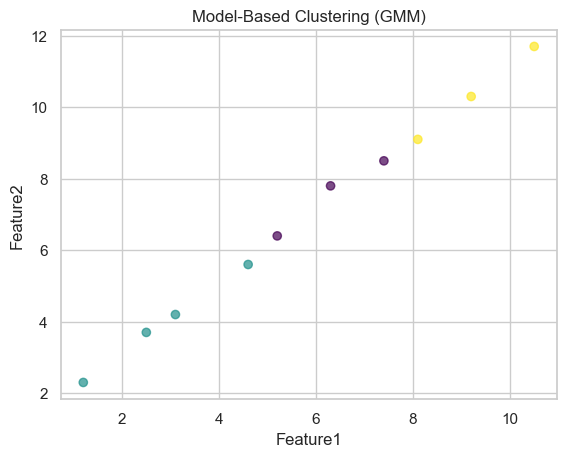

In [52]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Creating a fixed dataset with two numeric columns
fixed_data = {
    'Feature1': [1.2, 2.5, 3.1, 4.6, 5.2, 6.3, 7.4, 8.1, 9.2, 10.5],
    'Feature2': [2.3, 3.7, 4.2, 5.6, 6.4, 7.8, 8.5, 9.1, 10.3, 11.7],
    'Feature3': [10.1, 20.2, 30.3, 40.4, 50.5, 60.6, 70.7, 80.8, 90.9, 100.1]
}

# Create a DataFrame from the fixed data
data = pd.DataFrame(fixed_data)

# Select numerical columns (excluding non-numeric data)
numeric_columns = data.select_dtypes(include=[np.number]).columns

# If there are enough numeric columns, proceed with clustering
if len(numeric_columns) > 1:  # Ensure at least two numeric columns for clustering
    features = data[numeric_columns].dropna()  # Drop rows with missing values
    
    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3, random_state=0)
    gmm_labels = gmm.fit_predict(features)
    
    # Plot the clusters
    plt.scatter(features[numeric_columns[0]], features[numeric_columns[1]], c=gmm_labels, cmap='viridis', alpha=0.7)
    plt.title('Model-Based Clustering (GMM)')
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.show()
else:
    print("Not enough numeric columns for clustering.")


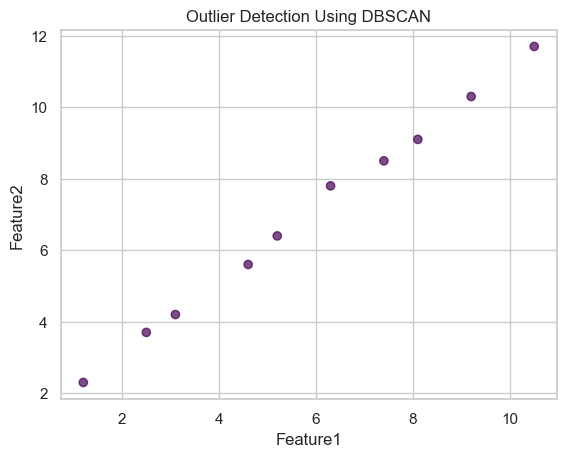

In [53]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Creating a fixed dataset with two numeric columns
fixed_data = {
    'Feature1': [1.2, 2.5, 3.1, 4.6, 5.2, 6.3, 7.4, 8.1, 9.2, 10.5],
    'Feature2': [2.3, 3.7, 4.2, 5.6, 6.4, 7.8, 8.5, 9.1, 10.3, 11.7],
    'Feature3': [10.1, 20.2, 30.3, 40.4, 50.5, 60.6, 70.7, 80.8, 90.9, 100.1]
}

# Create a DataFrame from the fixed data
data = pd.DataFrame(fixed_data)

# Select numerical columns (excluding non-numeric data)
numeric_columns = data.select_dtypes(include=[np.number]).columns

# If there are enough numeric columns, proceed with clustering
if len(numeric_columns) > 1:  # Ensure at least two numeric columns for clustering
    features = data[numeric_columns].dropna()  # Drop rows with missing values
    
    # DBSCAN for outlier detection
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(features)
    
    # Plot the results
    plt.scatter(features[numeric_columns[0]], features[numeric_columns[1]], c=labels, cmap='viridis', alpha=0.7)
    plt.title('Outlier Detection Using DBSCAN')
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.show()
else:
    print("Not enough numeric columns for clustering.")


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

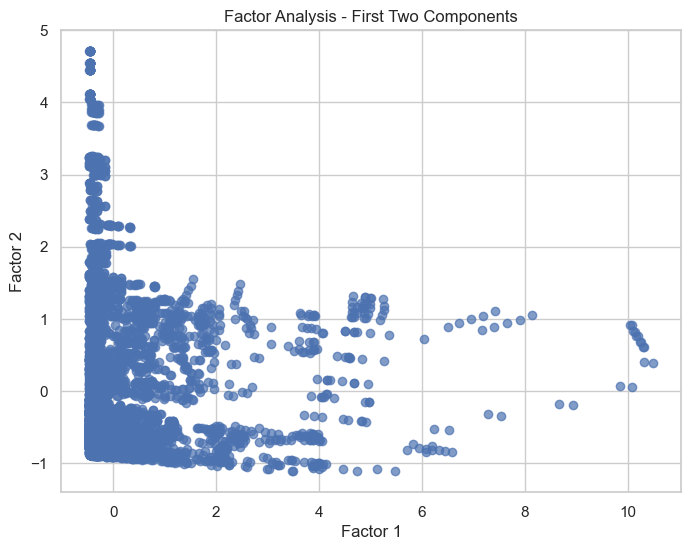

In [54]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Load the dataset from the provided path
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check the first few rows of the data to understand its structure
print(data.head())

# Example of cleaning columns (adjust based on your actual columns)
# If there is a 'Year' or other relevant columns for factor analysis, clean and extract them.

# Example: If 'Year' or 'Date' columns are present, extract the year
if 'Year' in data.columns:
    data['Year'] = data['Year'].astype(str).str.extract(r'(\d{4})').astype(float)

# If there are other date-related columns, convert them to the year if needed
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.year

# Identify numerical columns for factor analysis
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if we have enough numeric columns for factor analysis
if len(numeric_columns) >= 2:
    # Select the numeric columns of interest
    features = data[numeric_columns].dropna()

    # Perform Factor Analysis (adjust components if needed)
    factor = FactorAnalysis(n_components=2)
    factor_components = factor.fit_transform(features)

    # Plot the Factor components
    plt.figure(figsize=(8, 6))
    plt.scatter(factor_components[:, 0], factor_components[:, 1], alpha=0.7)
    plt.title('Factor Analysis - First Two Components')
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.show()
else:
    print("Not enough numeric columns for factor analysis.")


In [55]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset from the specified path
data = pd.read_csv(r'C:\Users\Pranika Kumar\Downloads\Suicide data.csv')

# Check the first few rows of the data to understand its structure
print(data.head())

# Example of cleaning columns (adjust based on your actual columns)
# Assuming 'Year' and 'Date added' columns, you may need to extract numeric data if necessary

# Example: If there is a 'Year' column, ensure it is numeric
if 'Year' in data.columns:
    data['Year'] = data['Year'].astype(str).str.extract(r'(\d{4})').astype(float)

# If there are any other date columns like 'Date added', convert them to year if needed
if 'Date added' in data.columns:
    data['Date added'] = pd.to_datetime(data['Date added'], errors='coerce').dt.year

# Identify numerical columns for PCA
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if there are enough numeric columns to proceed
if len(numeric_columns) >= 2:
    # Select the relevant numerical columns
    features = data[numeric_columns].dropna()

    # Apply PCA for dimensionality estimation
    pca = PCA()
    pca.fit(features)

    # Calculate the explained variance ratio for each component
    explained_variance = pca.explained_variance_ratio_

    # Calculate the cumulative variance to determine how many components explain 95% variance
    cumulative_variance = np.cumsum(explained_variance)
    n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

    print(f"Intrinsic Dimensionality: {n_components} components are needed to explain 95% variance.")
else:
    print("Not enough numeric columns for PCA.")


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

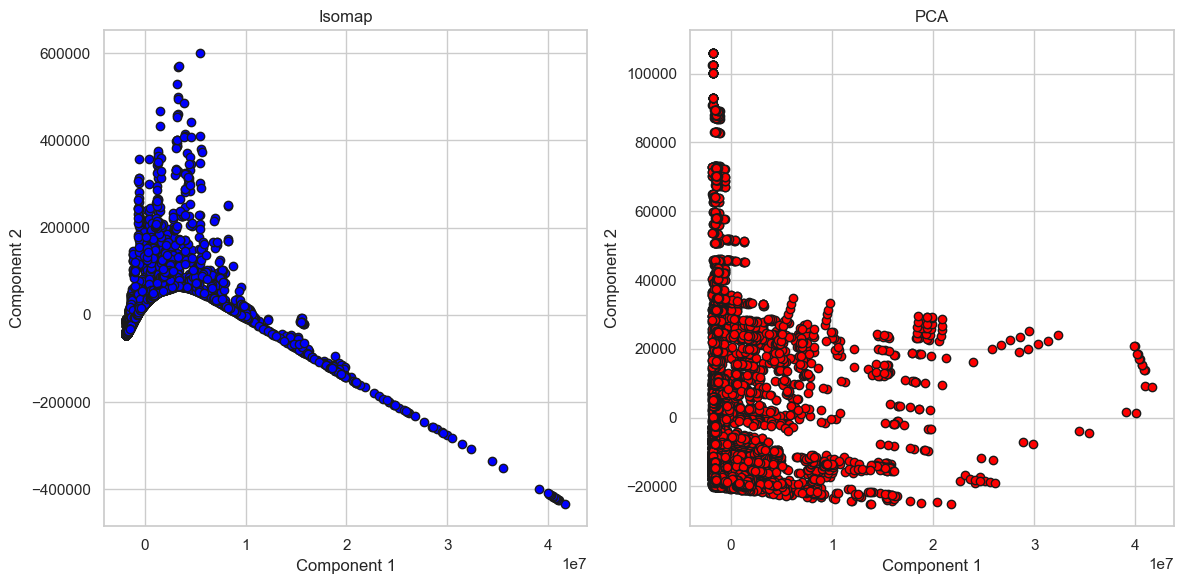

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# Load your dataset (example using 'Suicide data.csv')
data = pd.read_csv('C:/Users/Pranika Kumar/Downloads/Suicide data.csv')

# Extract features (numeric columns)
# Replace with the actual columns of interest for your dataset
numeric_columns = data.select_dtypes(include=[np.number]).columns
X = data[numeric_columns].dropna()  # Drop missing values if necessary

# If you have target labels, extract them (if available)
# For example, if 'Target' is a column in your dataset:
# y = data['Target']

# Apply Isomap for manifold learning
n_neighbors = 10  # Number of neighbors
n_components = 2  # Number of components for embedding
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_isomap = isomap.fit_transform(X)

# Apply PCA for comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Isomap plot
axes[0].scatter(X_isomap[:, 0], X_isomap[:, 1], c='blue', edgecolor='k')
axes[0].set_title('Isomap')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

# PCA plot for comparison
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c='red', edgecolor='k')
axes[1].set_title('PCA')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

plt.tight_layout()
plt.show()


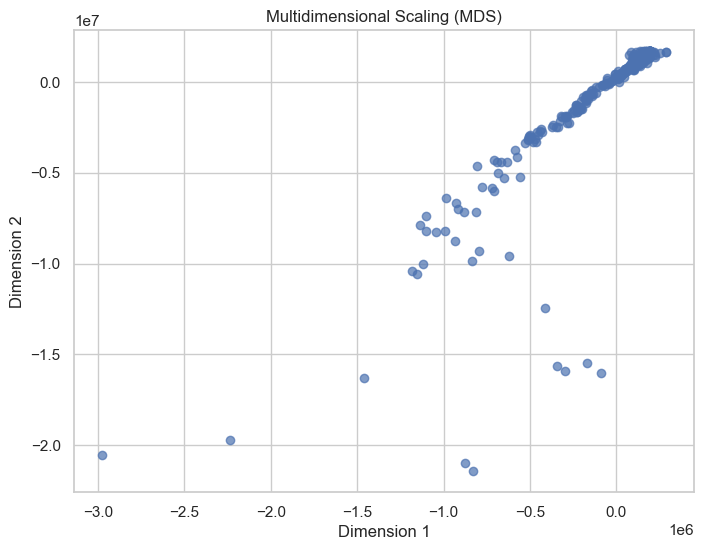

In [57]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the dataset (replace path with the actual one)
data = pd.read_csv('C:/Users/Pranika Kumar/Downloads/Suicide data.csv')

# Select numeric columns for MDS (you can choose specific columns based on your dataset)
numeric_columns = data.select_dtypes(include=[np.number]).columns
features = data[numeric_columns].dropna()  # Drop rows with missing values

# Downsample the data if needed (e.g., use 500 points)
features_sampled = features.sample(500, random_state=0)

# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=0)
mds_components = mds.fit_transform(features_sampled)

# Plot the MDS components
plt.figure(figsize=(8, 6))
plt.scatter(mds_components[:, 0], mds_components[:, 1], alpha=0.7)
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


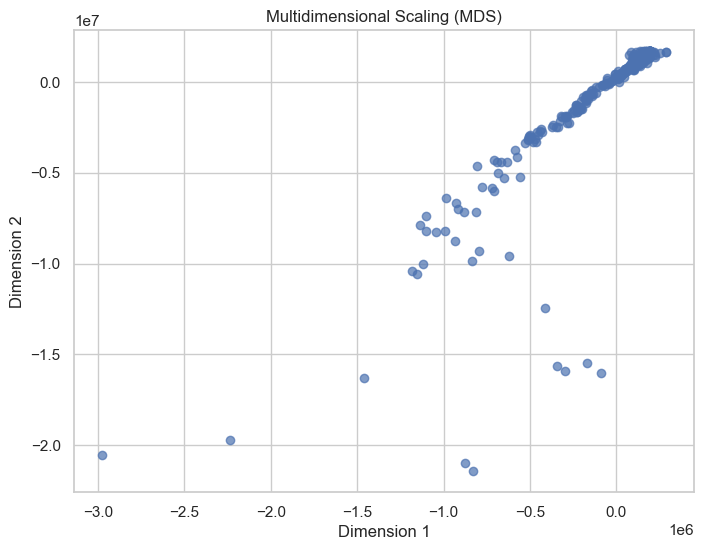

In [58]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the dataset (replace path with the actual one)
data = pd.read_csv('C:/Users/Pranika Kumar/Downloads/Suicide data.csv')

# Select numeric columns for MDS (you can choose specific columns based on your dataset)
numeric_columns = data.select_dtypes(include=[np.number]).columns
features = data[numeric_columns].dropna()  # Drop rows with missing values

# Downsample the data if needed (e.g., use 500 points)
features_sampled = features.sample(500, random_state=0)

# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=0)
mds_components = mds.fit_transform(features_sampled)

# Plot the MDS components
plt.figure(figsize=(8, 6))
plt.scatter(mds_components[:, 0], mds_components[:, 1], alpha=0.7)
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
